1) Write a program that approximates the value of $\pi$ using the
method described in the lecture.

2) Make a plot of the fractional error as a function of the number of
iterations.

3) Determine the dependency of the functional error on the number
of iterations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smplotlib
import matplotlib as mpl
import secrets
from scipy.optimize import curve_fit

In [2]:
seed = secrets.randbits(128)
rng_default = np.random.default_rng(seed)

In [3]:
def randpi(N, rng=rng_default):
    """
    It generates N random points within the unit square and computes the M points that lie within the unit circle.
    """
    x = rng.random(N)
    y = rng.random(N) 
    return 4.0 * np.count_nonzero(np.where(x*x + y*y < 1.0, 1, 0)) / N

In [4]:
N = np.geomspace(10, 1e7, 200, dtype=np.int32)
pi_vec = np.zeros(np.size(N))
seed = secrets.randbits(128)
rng = np.random.default_rng(seed)
for i, n in enumerate(N):
    pi_vec[i] = randpi(n, rng)

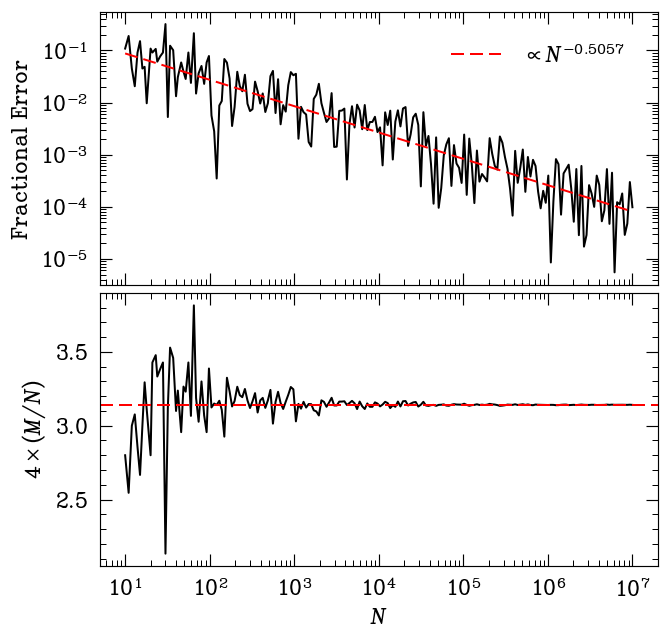

In [5]:
def FE_fit(N, A, alpha):
    return A * np.power(N, -alpha)

def logFE_fit(logN, A, alpha):
    return A - alpha * logN

FE = np.abs(pi_vec-np.pi)/np.pi
popt2, pcov2 = curve_fit(logFE_fit, np.log(N), np.log(FE))

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].set_ylabel('Fractional Error')
axes[0].loglog(N, FE)
axes[0].loglog(N, np.exp(logFE_fit(np.log(N), *popt2)), ls='--', c='r', label=r'$\propto N^{' + "{:.4f}".format(-popt2[1]) + '}$')

axes[1].set_xlabel(r'$N$')
axes[1].set_ylabel(r'$4 \times (M/N)$')
axes[1].semilogx(N, pi_vec)
axes[1].axhline(np.pi, ls='--', c='r')

axes[0].legend()
plt.subplots_adjust(hspace=0.03)